In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

<h1>Utility functions</h1>

In [2]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

<h1>Read the data</h1>

In [3]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

<p>Quick look</p>

In [4]:
train_df.shape

(42000, 785)

In [5]:
X, y = train_df.iloc[:,1:], train_df.iloc[:, 0]
X.shape
#y.shape

(42000, 784)

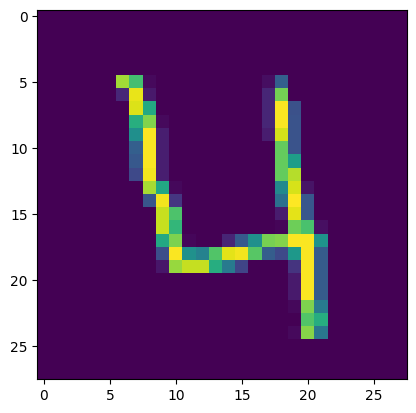

In [6]:
print_image(3, X)

<h4>Train test split</h4>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h1>Training a classifier</h1>

In [8]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [9]:
sgd_clf.fit(X_train, y_train)
preds = sgd_clf.predict(X_test)

In [10]:
print ("Classification Report")
print(classification_report(y_test, preds))
print ("Confusion Report")
print(confusion_matrix(y_test, preds))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       813
           1       0.97      0.93      0.95       961
           2       0.85      0.92      0.88       860
           3       0.92      0.75      0.83       863
           4       0.90      0.89      0.89       827
           5       0.64      0.90      0.74       756
           6       0.92      0.94      0.93       841
           7       0.89      0.92      0.91       899
           8       0.79      0.78      0.79       768
           9       0.94      0.66      0.77       812

    accuracy                           0.87      8400
   macro avg       0.87      0.86      0.86      8400
weighted avg       0.88      0.87      0.87      8400

Confusion Report
[[784   0   4   1   0   5  12   0   7   0]
 [  1 889  19   8   0   9   4   2  29   0]
 [  8   5 789   8   5  13  15   7  10   0]
 [  5   1  43 649   3 119   4   7  26   6]
 [  4   6  10   1 736  20   9 

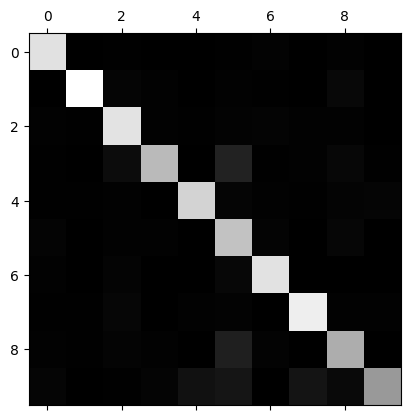

In [11]:
plt.matshow(confusion_matrix(y_test, preds), cmap=plt.cm.gray)
plt.show()


In [12]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
score = cross_val_score(rf, X_train, y_train)
print(np.mean(score))

0.9613988095238095


In [13]:
#Predicting on test data
preds=rf.predict(X_test)

In [14]:
preds = pd.Series(preds,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),preds],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)
print("Sumission to cv sucseess!")

Sumission to cv sucseess!
